In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

merged_table = pd.merge(ride_data, city_data, on="city", how="left")
merged_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


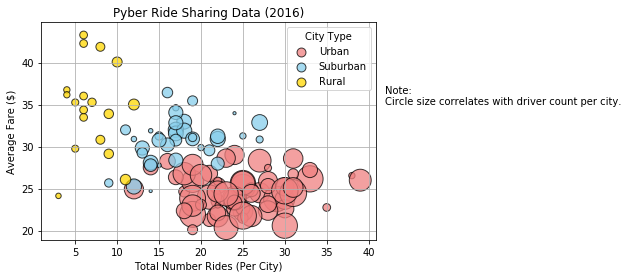

In [12]:
urban_type = merged_table.loc[merged_table['type'] == "Urban"]
suburban_type = merged_table.loc[merged_table['type'] == "Suburban"]
rural_type = merged_table.loc[merged_table['type'] == "Rural"]

urban_grouped = urban_type.groupby(["city"])
suburban_grouped = suburban_type.groupby(["city"])
rural_grouped = rural_type.groupby(["city"])

urban_avg_fare = urban_grouped["fare"].mean()
suburban_avg_fare = suburban_grouped["fare"].mean()
rural_avg_fare = rural_grouped["fare"].mean()

urban_size = urban_grouped["driver_count"].mean()
suburban_size = suburban_grouped["driver_count"].mean()
rural_size = rural_grouped["driver_count"].mean()

urban_ride_count = urban_grouped["ride_id"].count()
suburban_ride_count = suburban_grouped["ride_id"].count()
rural_ride_count = rural_grouped["ride_id"].count()

plt.scatter(urban_ride_count, urban_avg_fare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urban_size*10, alpha=0.75, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_size*10, alpha=0.75, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black",
            s=rural_ride_count*10, alpha=0.75, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number Rides (Per City)")
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")
plt.grid()

legend = plt.legend(loc="upper right", title= "City Type")
legend.legendHandles[0]._sizes = [80]
legend.legendHandles[1]._sizes = [80]
legend.legendHandles[2]._sizes = [80]

plt.savefig("Pyber Bubble Graph.png", bbox_inches = "tight")

plt.show()

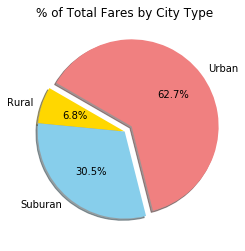

In [17]:
group_type = merged_table.groupby(["type"])
total_fares = group_type['fare'].sum()

labels = ["Rural", "Suburan", "Urban"]

colors = ["Gold", "Skyblue", "LightCoral"]

explode = (0, 0, 0.1)

plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% of Total Fares by City Type')

plt.savefig("Total Fares by City Pie Chart", bbox_inches = "tight")

plt.show()

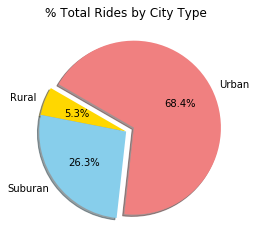

In [18]:
group_type = merged_table.groupby(["type"])
total_rides = group_type['ride_id'].count()

labels = ["Rural", "Suburan", "Urban"]

colors = ["Gold", "Skyblue", "LightCoral"]

explode = (0, 0, 0.1)

plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% Total Rides by City Type')

plt.savefig("Total Rides by City Type Pie Chart", bbox_inches = "tight")

plt.show()

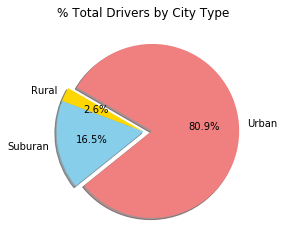

In [19]:
group_type = city_data.groupby(["type"])
total_fares = group_type['driver_count'].sum()

labels = ["Rural", "Suburan", "Urban"]

colors = ["Gold", "Skyblue", "LightCoral"]

explode = (0, 0, 0.1)

plt.pie(total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% Total Drivers by City Type')

plt.savefig("Total Drivers by City Type Pie Chart", bbox_inches = "tight")

plt.show()